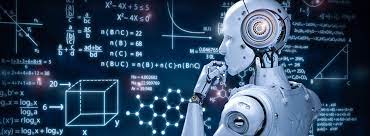

# Aula 5 - Tópicos Avançados de Machine Learning I

Nessa aula, iremos tratar dos seguintes conteúdos:
- Validação de Modelos;
- Pipeline de Modelos.

##   

## Validação de Modelos

Hoje iremos falar sobre algumas técnicas que podemos utilizar para garantir que a nossa modelagem esteja performando da melhor maneira possível com a nossa aplicação.<br><br>

Existem algumas técnicas de validação bem conhecidas do universo de Machine Learning, sendo elas: __Hold-Out__ e __Cross Validation__.<br><br>

### Hold-Out

Essa é uma técnica bem conhecida nossa! Onde o conceito dela é separarmnos o dataset em duas partes, seja uma base de __treino__ e uma base de __teste__. Usualmente fazemos essa separação utilizando a ferramenta _train_test_split_ do _Scikit-Learn_.

<img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/15185319/blogs-15-7-2020-02-1024x565.jpg" width=800>

<br><br>

### Cross-Validation (Validação Cruzada)

O __Cross Validation__ (Validação Cruzada) é uma técnica utilizada para medir o __poder de generalização__ do nosso modelo. São feitos testes na prática para saber o quão preciso é um modelo, ou seja o seu desempenho em um novo conjunto de dados. De início, faremos a separação da mesma forma em __treino__ e __teste__, em seguida usaremos a seguinte __técnica de generalização__:

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=800>

O que está acontecendo na prática aqui? Iremos detalhar:
- Primeiro separamos a base em treino e teste;
- Usando o Cross Validation, esta função irá separar a nossa base de teste em por exemplo 5 partes;
- Serão feitas 5 rodadas de avaliação da nossa base, usando 4 partes para __treino__ e uma para __validação__ (sempre alternando a base de validação entre as partes);
- Calcula-se alguma métrica de avaliação para cada rodada, para acompanharmos o desempenho do modelo;
- Por fim, temos como o resultado o score médio para o nosso modelo (ou seja, o quão bom ele está generalizando).

<br><br>
Podemos fazer o Cross Validation de diversas formas: sendo testando diretamente o nosso modelo usando o [__cross_val_score__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), ou utilizando duas funções do _Scikit-Learn_ que fazer as separações em _Folds_ para testarmos no modelo sendo elas o [__K-Fold__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) e [__Stratified K-Fold__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold).
<br><br>
A diferença de quando utilizar o __K-Fold__ e o __Stratified K-Fold__ é a mesma de quando usamos o _stratify_ no _train_test_split_, quando trabalhamos como __bases desbalanceadas__ utilizamos o _Stratified K-Fold_ para garantir que cada uma das separações feitas no Cross-Validation tenha a mesma proporção de dados.

<br>
Vamos testar isso na prática:

Vamos utilizar a base de dados do _bank-full.csv_ e avaliar a performance utilizando o _K-Fold / Stratified K-Fold_:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregando o dataset e olhando para os nossos dados
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Vamos dar uma olhada em como está os nossos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Verificando a proporção da target
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
# Dropando a target das nossas features
X = df.drop(['y'], axis = 1)

In [ ]:
# Fazenfo um get_dummies para colunar as nossas variáveis categóricas
X_with_dummies = pd.get_dummies(X, prefix_sep = '_', columns=['job', 
                                                              'marital', 
                                                              'education',
                                                              'default',
                                                              'housing',
                                                              'loan',
                                                              'contact',
                                                              'month',
                                                              'poutcome'])

In [ ]:
# transformando a target
y_target = np.where(df['y'] == 'yes', 1, 0)
y_target

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Separando em train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_dummies, 
                                                    y_target, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y_target)

In [ ]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [ ]:
# Aplicando na base de teste a normalização
X_test_std = scaler.transform(X_test)

In [ ]:
# Testando com o modelo RandomForest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)

Vamos utilizar agora o _cross_vasl_score_:

In [ ]:
# Utilizando o Cross Validation
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, X_train_std, y_train, scoring='accuracy', cv=5))

[0.90552923 0.90410742 0.90472429 0.90346026 0.90203824]


Agora testando o _Stratified K-Fold_:

In [ ]:
# Utilizando o StratifiedKFold

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5)
kf.get_n_splits(X_train_std)

5

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

list_accuracy = []
list_precision = []
list_recall = []
list_f1_score = []

i = 1
for train_index, val_index in kf.split(X_train_std, y_train):
    print("============================================================================================")
    print("Fold ", i)
    print("TRAIN:", train_index, "VALIDATION:", val_index)
    KFold_X_train, KFold_X_val = X_train_std[train_index], X_train_std[val_index]
    KFold_y_train, KFold_y_val = y_train[train_index], y_train[val_index]
    model.fit(KFold_X_train, KFold_y_train)
    y_pred = model.predict(KFold_X_val)
    #Calcula as métricas
    acc = accuracy_score(KFold_y_val, y_pred)
    prec = precision_score(KFold_y_val, y_pred)
    recall = recall_score(KFold_y_val, y_pred)
    f1 = f1_score(KFold_y_val, y_pred)
    print("Accuracy: ", acc)
    print("Precison: ", prec)
    print("Recal:    ", recall)
    print("F1-Score: ", f1)
    # salva na lista
    list_accuracy.append(acc)
    list_precision.append(prec)
    list_recall.append(recall)
    list_f1_score.append(f1)
    i += 1
print("============================================================================================")

Fold  1
TRAIN: [ 6230  6237  6238 ... 31644 31645 31646] VALIDATION: [   0    1    2 ... 6337 6338 6339]
Accuracy:  0.9055292259083728
Precison:  0.6613995485327314
Recal:     0.39541160593792174
F1-Score:  0.49493243243243246
Fold  2
TRAIN: [    0     1     2 ... 31644 31645 31646] VALIDATION: [ 6230  6237  6238 ... 12687 12689 12690]
Accuracy:  0.9041074249605056
Precison:  0.6572769953051644
Recal:     0.37786774628879893
F1-Score:  0.47986289631533846
Fold  3
TRAIN: [    0     1     2 ... 31644 31645 31646] VALIDATION: [12437 12439 12441 ... 19002 19003 19004]
Accuracy:  0.9047242850371306
Precison:  0.66270783847981
Recal:     0.377027027027027
F1-Score:  0.48062015503875966
Fold  4
TRAIN: [    0     1     2 ... 31644 31645 31646] VALIDATION: [18866 18867 18874 ... 25466 25472 25474]
Accuracy:  0.9034602622847211
Precison:  0.643652561247216
Recal:     0.39054054054054055
F1-Score:  0.4861227922624054
Fold  5
TRAIN: [    0     1     2 ... 25466 25472 25474] VALIDATION: [25294 2529

Importante lembrar que, tanto para o _cross_val_score_ quando para os tipos de _K-Folds_, esse métodos são usados para __avalaiar a generalização do modelo__. Após testar o nosso modelo e verificar que essa teve uma boa performance (isso ajuda a minimizar as chances de _Underfitting_ e _Overfitting_), deposi desses processos podemos agora rodar o nosso modelo e fazer as predições para a base de __teste__!

##   

## Pipeline de Modelos

Agora vamos aprender como montar Pipelines de Modelos e deixá-los de uma maneira mais automatizada, deixando processos de limpeza, normalização e modelagem prontos para receberem novos dados!

### SimpleImputer

O [__SimpleImputer__](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) é uma ferramenta bem interessante, onde podemos já deixar claro quais serão as estratégias para lidar com __valores númericos faltantes__.<br><br>
Vamos começar importando a biblioteca do __SimpleImputer__:

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
[5, 8, 10, np.nan, 7], [np.nan, 1, np.nan, 0, 9], [18, 10, 6, 7, 15], [5, 7, 9, np.nan, np.nan],
[1, 3, np.nan, np.nan, np.nan]

df = pd.DataFrame(np.array([[5, 8, 10, np.nan, 7], 
                            [np.nan, 1, np.nan, 0, 9], 
                            [18, 10, 6, 7, 15], 
                            [5, 7, 9, np.nan, np.nan],
                            [1, 3, np.nan, np.nan, np.nan]]), columns=['a', 'b', 'c', 'd', 'e'])
df.head()

,a,b,c,d,e
0,5.0,8.0,10.0,NaN,7.0
1,NaN,1.0,NaN,0.0,9.0
2,18.0,10.0,6.0,7.0,15.0
3,5.0,7.0,9.0,NaN,NaN
4,1.0,3.0,NaN,NaN,NaN


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imputer.fit_transform(df)

array([[ 5.        ,  8.        , 10.        ,  3.5       ,  7.        ],
       [ 7.25      ,  1.        ,  8.33333333,  0.        ,  9.        ],
       [18.        , 10.        ,  6.        ,  7.        , 15.        ],
       [ 5.        ,  7.        ,  9.        ,  3.5       , 10.33333333],
       [ 1.        ,  3.        ,  8.33333333,  3.5       , 10.33333333]])

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
imputer.fit_transform(df)

array([[ 5. ,  8. , 10. ,  3.5,  7. ],
       [ 5. ,  1. ,  9. ,  0. ,  9. ],
       [18. , 10. ,  6. ,  7. , 15. ],
       [ 5. ,  7. ,  9. ,  3.5,  9. ],
       [ 1. ,  3. ,  9. ,  3.5,  9. ]])

##   

### Label Encoding e One Hot Encoding

Agora vamos ver mais algumas funções para tratamento de dados categóricos, para podermos utilizar nos Pipelines. São duas funções para tratamento dos dados sendo elas __Label Encoding__ e __One Hot Encoding__.<br><br>
No caso para o __Label Encoding__, a nossa função vai trocar as variáveis categóricas por labels (ou números no caso) onde podemos identificar a diferença entre as labels. Importante é que no caso do __Label Encoding__, a ordem das categorias importa! Então precisamos saber exatamente onde é melhor aplicar esse método:

<img src="https://i.imgur.com/tEogUAr.png" width=1000>

Já no caso do __One Hot Encoding__, temos algo bem parecido com o que faziamos usando a função do Pandas _get_dummies_, onde colunavamos as nossas variáveis categóricas:

<img src="https://i.imgur.com/TW5m0aJ.png" width=1000>

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
insurance = pd.read_csv('insurance.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = insurance[['sex', 'smoker']]
df.head()

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no


In [ ]:
df_labels = df.copy()

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for col in df.columns:
    df_labels[col] = label_encoder.fit_transform(df[col])

In [ ]:
df_labels.head()

,sex,smoker
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


Agora testando o __OneHotEncoder__:

In [ ]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
OH_insurance = OH_encoder.fit_transform(insurance[['sex', 'smoker', 'region']])

In [ ]:
OH_insurance

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [ ]:
columns = OH_encoder.get_feature_names(['sex', 'smoker', 'region'])
columns

array(['sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [ ]:
OH_df = pd.DataFrame(OH_insurance, columns = columns)
OH_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


##   

### Pipeline

A ideia do Pipeline é de todo o processo com os dados, desde tratamento e normalização dos dados até a modelagem, isso tudo passe por uma "esteira de processos" onde indicamos todos os passos que precisam ser feitos com os nossos dados.
Vamos ver a funcionalidade na prática:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df['Chance of Admit '] = np.where(df['Chance of Admit '] > 0.7, 1, 0)

In [ ]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [ ]:
# Split de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# Utilizando o Pipeline
from sklearn.pipeline import Pipeline

# o que queremos utilizar para construir o modelo
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Montando o nosso Pipeline de Dados
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', RandomForestClassifier())])

# Fit nos Dados no nosso Pipeline (Normalização + Modelo)
pipeline.fit(X_train, y_train)

# Predições do Pipeline
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76        43
           1       0.83      0.77      0.80        57

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



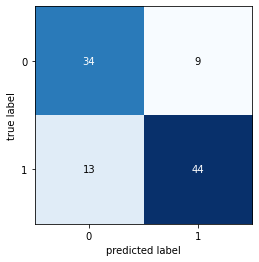

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

##   

## Exercicios

**1)** Vamos utilizar o dataset sobre a qualidade do vinho tinto _'winequality-red.csv'_. Crie um _Pipeline_ onde faça os seguintes passos: _SimpleImputer_, Normalização dos Dados e _RandomForest_. Montado o _Pipeline_, utilize o _Stratified K-Fold_ para separar a base de treino em 5 partes e em seguida faça o _Cross Validation_ utilizando o _cross_val_score_.

##   